# Possible factors that might be accountable to imblance of the data

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import pandas as pd

from dataloader import BaseDataset
from utils.util import cal_velocity
from param import *

## Representatives

### Firing rate

Text(0.5, 0.98, 'firing rate at each position')

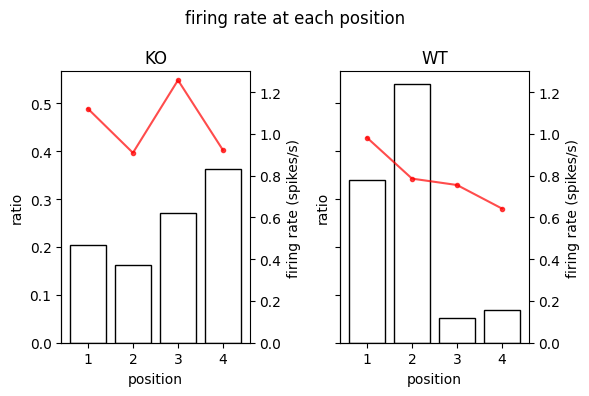

In [39]:
fig, axes = plt.subplots(figsize=(6,4), ncols=2, sharey=True, tight_layout=True)
sns.despine()

for plot_i, data_dir in enumerate(ParamDir().data_list[[1, 2]]):

    data_name = str(data_dir).split('/')[-1]
    mouse_type = "KO" if "KO" in data_name else "WT"
    dataset = BaseDataset(data_dir, ParamData().mobility, ParamData().shuffle, ParamData().random_state)
    position = dataset._discretize_coords()

    classes, count = np.unique(position, return_counts=True)
    ratio = count/np.sum(count)       

    pos_spikes = pd.DataFrame({"position": position, "summed_spikes": dataset.spikes.sum(axis=1)})
    spikes_on_position = pos_spikes.groupby("position")["summed_spikes"].sum()
    spikes_on_position = spikes_on_position.values.ravel()/(count/3)

    ind = [str(i+1) for i in range(len(ratio))]

    axes[plot_i].bar(ind, ratio, facecolor="white", edgecolor="black")
    axes[plot_i].set_ylabel("ratio")
    axes[plot_i].set_title(mouse_type)
    axes[plot_i].set_xlabel("position")

    ax2 = axes[plot_i].twinx()

    ax2.plot(ind, spikes_on_position, color="r", alpha=.7, marker=".")
    ax2.set_ylim(0,1.3)
    ax2.set_ylabel("firing rate (spikes/s)")

plt.suptitle("firing rate at each position")


### Velocity

Text(0.5, 0.98, 'mean elocity at each position')

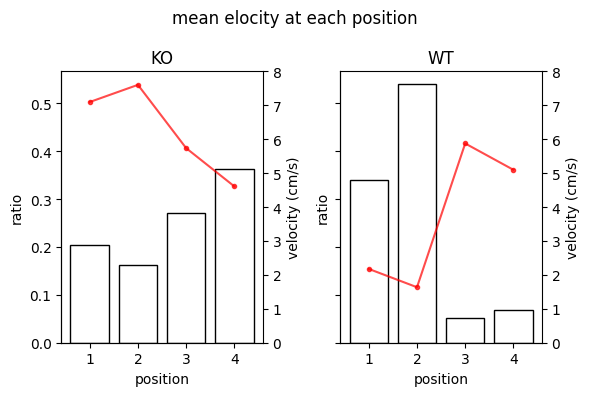

In [41]:
fig, axes = plt.subplots(figsize=(6,4), ncols=2, sharey=True, tight_layout=True)
sns.despine()

for plot_i, data_dir in enumerate(ParamDir().data_list[[1, 2]]):

    data_name = str(data_dir).split('/')[-1]
    mouse_type = "KO" if "KO" in data_name else "WT"
    dataset = BaseDataset(data_dir, ParamData().mobility, ParamData().shuffle, ParamData().random_state)
    position = dataset._discretize_coords()
    vel = cal_velocity(dataset.coords_xy)

    classes, count = np.unique(position, return_counts=True)
    ratio = count/np.sum(count)       

    pos_spikes = pd.DataFrame({"position": position, "velocity": vel})
    vel_on_position = pos_spikes.groupby("position").mean()

    ind = [str(i+1) for i in range(len(ratio))]

    axes[plot_i].bar(ind, ratio, facecolor="white", edgecolor="black")
    axes[plot_i].set_ylabel("ratio")
    axes[plot_i].set_title(mouse_type)
    axes[plot_i].set_xlabel("position")

    ax2 = axes[plot_i].twinx()

    ax2.plot(ind, vel_on_position, color="r", alpha=.7, marker=".")
    ax2.set_ylim(0, 8)
    ax2.set_ylabel("velocity (cm/s)")
plt.suptitle("mean elocity at each position")



## All mice

### Firing rate

In [45]:

spikes_at_position_all = []
ratio_all = []
for data_dir in ParamDir().data_list:

    data_name = str(data_dir).split('/')[-1]
    mouse_type = "KO" if "KO" in data_name else "WT"
    dataset = BaseDataset(data_dir, ParamData().mobility, ParamData().shuffle, ParamData().random_state)
    position = dataset._discretize_coords()

    # ratio of each position
    classes, count = np.unique(position, return_counts=True)
    ratio = count/np.sum(count) 
    ratio_all.append([ratio, mouse_type])      

    # mean firing rate at each position
    pos_spikes = pd.DataFrame({"position": position, "summed_spikes": dataset.spikes.sum(axis=1)})
    spikes_at_position = pos_spikes.groupby("position")["summed_spikes"].sum()
    spikes_at_position = spikes_at_position.values.ravel()/(count/3)
    spikes_at_position_all.append([spikes_at_position, mouse_type])



In [176]:
df_spikes_on_position_all = pd.DataFrame(
    spikes_at_position_all, 
    columns=["firing rate at position", "mouse type"])

mean_spikes_at_position = df_spikes_on_position_all.groupby("mouse type").mean().values
std_spikes_at_position = [
    df_spikes_on_position_all[df_spikes_on_position_all["mouse type"]=="KO"]["firing rate at position"].values.std(),
    df_spikes_on_position_all[df_spikes_on_position_all["mouse type"]=="WT"]["firing rate at position"].values.std()
]

df_ratio_all = pd.DataFrame(
    ratio_all,
    columns=["ratio of position", "mouse type"]
)

mean_ratio = df_ratio_all.groupby("mouse type").mean().values
std_ratio = [
    df_ratio_all[df_ratio_all["mouse type"]=="KO"]["ratio of position"].values.std(),
    df_ratio_all[df_ratio_all["mouse type"]=="WT"]["ratio of position"].values.std() ]
ind = [str(i+1) for i in range(len(std_ratio[0]))]

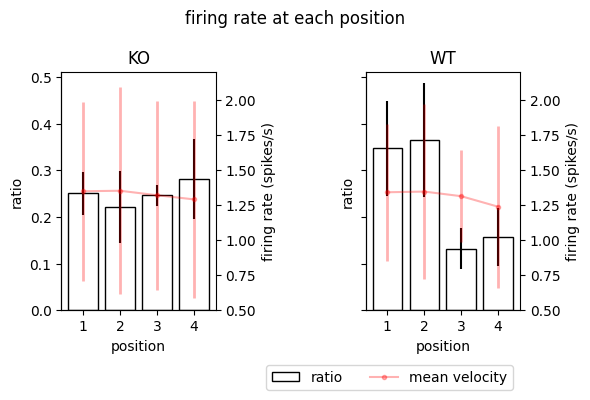

In [187]:
fig, axes = plt.subplots(figsize=(6,4), ncols=2, sharey=True, tight_layout=True)
sns.despine()

for plot_i in range(2):
    mouse_type = "KO" if plot_i == 0 else "WT"
    lin1 = axes[plot_i].bar(ind, mean_ratio[plot_i][0], 
                     yerr=std_ratio[plot_i], 
                     facecolor="white", 
                     edgecolor="black",
                     label="ratio")  
    axes[plot_i].set_title(mouse_type)
    axes[plot_i].set_xlabel("position")
    axes[plot_i].set_ylabel("ratio")

    ax2 = axes[plot_i].twinx()

    lin2 = ax2.errorbar(
        ind, mean_spikes_at_position[plot_i][0], 
        color="r", 
        alpha=.3, 
        marker=".", 
        yerr=std_spikes_at_position[plot_i],
        elinewidth=2,
        label="mean velocity")
    ax2.set_ylim(.5,2.2)
    ax2.set_ylabel("firing rate (spikes/s)")

plt.suptitle("firing rate at each position")
plt.legend(
    [lin1[0], lin2[0]], [l.get_label() for l in [lin1, lin2]], 
    ncol=2, 
    bbox_to_anchor=(1,-.2))

### Velocity

In [113]:

vel_at_position_all = []
ratio_all = []
for data_dir in ParamDir().data_list:

    data_name = str(data_dir).split('/')[-1]
    mouse_type = "KO" if "KO" in data_name else "WT"
    dataset = BaseDataset(data_dir, ParamData().mobility, ParamData().shuffle, ParamData().random_state)
    position = dataset._discretize_coords()

    # ratio of each position
    classes, count = np.unique(position, return_counts=True)
    ratio = count/np.sum(count) 
    ratio_all.append([ratio, mouse_type])      

    # mean velocity at each position
    pos_vel = pd.DataFrame({"position": position, "velocity": cal_velocity(dataset.coords_xy)})
    vel_at_position = pos_vel.groupby("position")["velocity"].mean().values
    vel_at_position_all.append([vel_at_position, mouse_type])



In [182]:
df_vel_on_position_all = pd.DataFrame(
    vel_at_position_all, 
    columns=["velocity at position", "mouse type"])

mean_vel_at_position = df_vel_on_position_all.groupby("mouse type").mean().values
std_vel_at_position = [
    df_vel_on_position_all[df_vel_on_position_all["mouse type"]=="KO"]["velocity at position"].values.std(),
    df_vel_on_position_all[df_vel_on_position_all["mouse type"]=="WT"]["velocity at position"].values.std()
]

df_ratio_all = pd.DataFrame(
    ratio_all,
    columns=["ratio of position", "mouse type"]
)

mean_ratio = df_ratio_all.groupby("mouse type").mean().values
std_ratio = [
    df_ratio_all[df_ratio_all["mouse type"]=="KO"]["ratio of position"].values.std(),
    df_ratio_all[df_ratio_all["mouse type"]=="WT"]["ratio of position"].values.std() ]
ind = [str(i+1) for i in range(len(std_ratio[0]))]

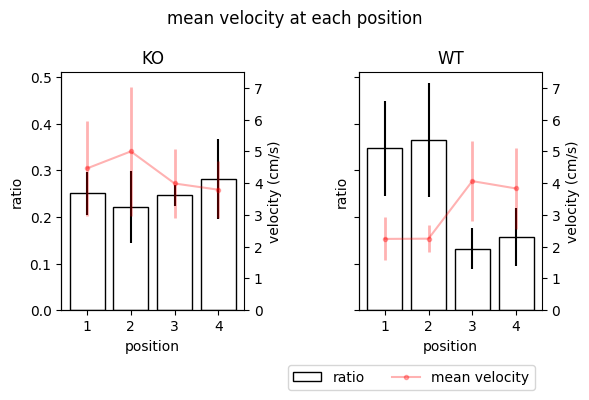

In [184]:
fig, axes = plt.subplots(figsize=(6,4), ncols=2, sharey=True, tight_layout=True)
sns.despine()

for plot_i in range(2):
    mouse_type = "KO" if plot_i == 0 else "WT"
    lin1 = axes[plot_i].bar(ind, mean_ratio[plot_i][0], 
                     yerr=std_ratio[plot_i], 
                     facecolor="white", 
                     edgecolor="black",
                     label="ratio")
    axes[plot_i].set_ylabel("ratio")
    axes[plot_i].set_title(mouse_type)
    axes[plot_i].set_xlabel("position")

    ax2 = axes[plot_i].twinx()

    lin2 = ax2.errorbar(ind, mean_vel_at_position[plot_i][0], 
                 color="r", 
                 alpha=.3, 
                 marker=".", 
                 yerr=std_vel_at_position[plot_i],
                 elinewidth=2,
                 label="mean velocity")
    ax2.set_ylim(0,7.5)
    ax2.set_ylabel("velocity (cm/s)")

plt.suptitle("mean velocity at each position")


plt.legend([
    lin1[0], lin2[0]], [l.get_label() for l in [lin1, lin2]], 
    ncol=2, 
    bbox_to_anchor=(1,-.2))

In [155]:
lin2.get_label()

'mean velocity'

In [148]:
lin2[2]

(<matplotlib.collections.LineCollection at 0x7fd094e73490>,)

In [136]:
ax2.get_legend()+axes[plot_i].get_legend()

TypeError: unsupported operand type(s) for +: 'Legend' and 'Legend'

In [117]:
mean_vel_at_position

array([[array([4.46360132, 4.99776372, 3.98805406, 3.79280014])],
       [array([2.24470329, 2.25222136, 4.06303454, 3.83157121])]],
      dtype=object)